In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy.integrate

# plotting


In [2]:
x = np.linspace(0,np.pi*2, 100)
y = np.sin(x)
z = np.cos(x)
fig,ax = plt.figure(1,figsize=(10,4))
plt.plot(x,y)
plt.figure(2,figsize=(15,10))
plt.polar(x,y)
plt.polar(x,z,"")
plt.xlabel("Theta",loc='left')
plt.ylabel("F(theta)")
plt.legend()

plt.show()


KeyboardInterrupt



<Figure size 1000x400 with 0 Axes>

# Surfaces

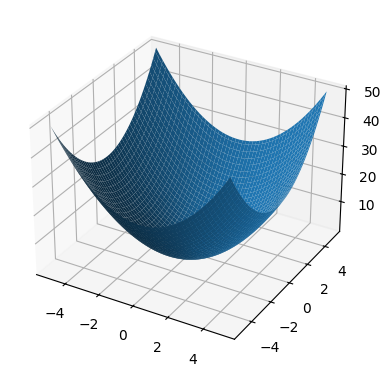

In [6]:
#still need to understand meshgrid
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)

xy, yx = np.meshgrid(x,y)

z = xy**2 + yx**2



fig = plt.figure(3, figsize=(10,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(xy,yx,z)

np.min(z)


# roots


In [39]:
import scipy.optimize as opt

def function(x):
  return x**3-6*x**2+9*x-3

x = np.linspace(-10,10,10)
roots = []
for i in x:
  result = opt.fsolve(function,i)
  result = np.round(result,4)
  if result not in roots:
    roots.append(result)

print(roots)


[array([0.4679]), array([1.6527]), array([3.8794])]


# 24. uzdevums (KD1)

Uzzīmēt $y=sin(2x)+sin(x^2)$
) funkcijas grafiku. Atrast argumenta vērtības, pie kurām
funkcija pieņem vērtību y=1,25. Atrast funkcijas augšanas un dilšanas intervālus.
Funkcija ir definēta intervālā [0..3].


c:\Users\danie\miniconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\danie\AppData\Local\Temp\ipykernel_28508\907296289.py:67: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


roots: [0.5816 1.4034]
intervals: [1.04204204 2.2042042  2.85585586]


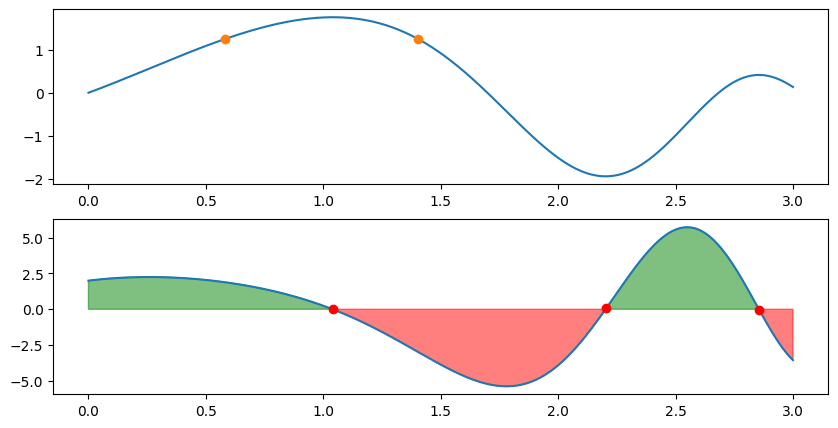

In [7]:


from enum import verify
from tabnanny import verbose
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sympy import root

x_min = 0
x_max = 3
x = np.linspace(x_min,x_max,1000)

def y(x):
  return np.sin(2*x)+np.sin(x**2)

def f(x):
  return y(x) - 1.25

# dilšanas un augšanas intervāli
def dy(x, dx=0.001):
  return (y(x+dx)-y(x))/dx

roots = np.array([])
  
for i in x:
  result = opt.fsolve(f,i)
  #verify

  if not np.isclose(f(result),0):
    break
  
  result = np.round(result,4)
  if result not in roots and result>=x_min and result<=x_max:
    roots = np.append(roots,result)
# remove duplicates
roots = list(set(roots))

roots = np.array(roots)
print(f"roots: {roots}")
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,5))
ax1.plot(x,y(x))
ax1.plot(roots, y(roots), 'o')



intervals = np.array([])
prev = dy(x[0])
for i in x:
  if(dy(i)>0 and prev<0):
    intervals= np.append(intervals,i)
  elif(dy(i)<0) and (prev>0):
    intervals = np.append(intervals,i)

  prev = dy(i)
  
print(f"intervals: {intervals}")


ax2.plot(x,dy(x))

# to better show the intervals
ax2.fill_between(x,dy(x),0,where=(dy(x)>0),color='green',alpha=0.5)
ax2.fill_between(x,dy(x),0,where=(dy(x)<0),color='red',alpha=0.5)

ax2.plot(intervals,dy(intervals),"ro")
fig.show()
